<a href="https://colab.research.google.com/github/sunilhucharaddi/fastai-v3/blob/master/lesson_3_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**IMDB**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [7]:
 path = untar_data(URLs.IMDB_SAMPLE)
 path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [8]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [9]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [10]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()


In [0]:
data = load_data(path)

**TOkennization**

In [13]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


**Numericalization**

In [14]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [15]:
data.train_ds[0][0]

Text xxbos a beautiful xxunk in xxmaj london is swept off her feet by a millionaire tea plantation owner and soon finds herself married and living with him at his xxunk in xxmaj british xxmaj xxunk . xxmaj although based upon the book by xxmaj robert xxmaj xxunk , this initial set - up is highly reminiscent of xxmaj xxunk 's " xxmaj rebecca " , with leading lady xxmaj elizabeth xxmaj taylor clashing with the imposing chief of staff at the mansion and ( almost immediately ) her own husband , who is still under the thumb of his deceased - but - xxunk father . xxmaj taylor , a last - minute substitute for an xxunk xxmaj xxunk xxmaj leigh , looks xxunk - smooth in her high fashion wardrobe , and her performance is quite strong ; however , once husband xxmaj peter xxmaj finch starts drinking heavily and xxunk orders at her , one might think her dedication to him rather masochistic ( this feeling xxunk the ending as well ) . xxmaj still , the film offers a xxunk lot for soap buffs : romantic

In [16]:
data.train_ds[0][0].data[:10]

array([   2,   13,  335,    0,   18,    5, 2466,   16, 3835,  145])

**With data block API**

In [17]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
          .split_from_df(col=2)
          .label_from_df(cols=0)
          .databunch())

**Language model**

In [0]:
bs=48

In [19]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/test')]

In [20]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat')]

In [21]:
data_lm = (TextList.from_folder(path)
            #Inputs: all the text files in path
           .filter_by_folder(include=['train','test', 'unsup'])
           #we may have other temp folders that contain text files so we keep whats only in train and test)
           .split_by_rand_pct(0.1)
           #we randomly split and keep 10%(10,000reviews ) for validation
           .label_for_lm()
           #we want to so a language model so we label accordingly
           .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [23]:
data_lm.show_batch()

idx,text
0,"the night from a xxmaj mariah xxmaj carey nightmare ! ;) \n \n xxmaj so - i watched it , but i watched most of it in fast forward . xxmaj you get the picture that most of the cast are mean people who are going to ' get it in bad ways ' as soon as they are introduced . \n \n xxmaj this is a real"
1,"- shots outside of courtrooms . \n \n xxmaj the assassination is a big success apart from the fact , that the escape plan blew . xxmaj so xxmaj dial 's partner and local liaison gets killed in action trying to escape the police , whilst xxmaj dial becomes hot property with the xxmaj london coppers trying to get to him and xxup cia trying to dispose of him"
2,"now enjoy xxmaj second xxmaj string , a delicious xxup tv movie depicting a tale of a rag - tag gang of second stringers ( thus the title ) who are thrust into the position of starters due to an order of bad oysters . \n \n xxmaj because of the motivational direction of both the director xxmaj robert xxmaj lieberman and the xxmaj buffalo xxmaj bills ' last"
3,"the xxmaj christian xxmaj bale and xxmaj kate xxmaj beckinsale characters are so annoying and unbelievably fake that the whole drama of the story , which weighs on their attitude towards the people they have to live with and their new dwelling , falls apart from the get - go . xxmaj those characters are n't real people but just types . \n \n 2 - xxmaj kate xxmaj"
4,"still "" normal "" and "" appropriate "" male who searches the ideal woman . xxmaj his "" city of women "" is idealistic and exists in his inner self , in his mind the climax of which is the ideal woman . xxmaj the latter one is a true "" conqueror "" , a male with excesses , with a number of women he has conquered by flesh ."


In [0]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.3)

In [32]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


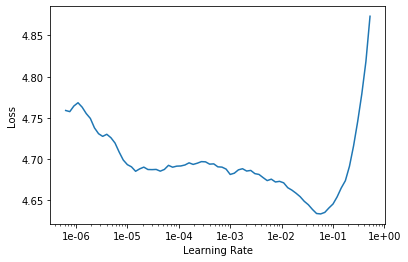

In [33]:
learn.recorder.plot(skip_end=15)

In [34]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.153199,4.020051,0.295099,47:17


In [0]:
learn.save('fit_head')

In [36]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos a friend of mine made me a tape of various stuff . xxmaj this was on it . i had never even heard of this film before ... now i know why . i wonder why ' xxmaj glitter ' has a lower rating then this drivel , but i am afraid to watch that film to find out for myself lest i wake up in the middle of the night from a xxmaj mariah xxmaj carey nightmare ! ;) 
 
  xxmaj so - i watched it , but i watched most of it in fast forward . xxmaj you get the picture that most of the cast are mean people who are going to ' get it in bad ways ' as soon as they are introduced . 
 
  xxmaj this is a real stinker - one of those ' heavy metal ' horror films that never should have been conceived . xxmaj the problem is not that the movie is stupid , cheesy , and inane , but that that the movie realizes it is such and still continues to deliver the same old good versus evil confrontation - and guess who wins , and guess ho

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned')

In [0]:
TEXT = 'I liked this movie because'
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=0.75) for _ in range(N_SENTENCES)))

In [0]:
learn.save_encoder('fine_tuned_enc')

**Classifier**

In [0]:
path = untar_data(URLs.IMDB)

In [0]:
data_class = (TextList.from_folder(path, vocab=data_lm.vocab)
              #grab all the text files in path
              .split_by_folder(valid='test')
              #split by train and valid folder(that only keeps 'train and'test' so no filter)
              .label_from_folder(classes=['neg','pos'])
              #label_them all with their folders
              .databunch(bs=bs))
data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [0]:
data_clas.show_batch()

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1,2e-2,moms=(0.8,0.7))

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1,slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [0]:
learn.freeze_to(-3)
learn_fit_one_cycle(1,slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
learn.save('third')

In [0]:
learn.load('third')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [0]:
learn.predict("I really loved that movie, it was awesome!")